Importing The Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
717,ham,Book which lesson? then you msg me... I will c...,NaN,NaN,NaN
5241,ham,Its a part of checking IQ,NaN,NaN,NaN
4003,ham,Well there's a pattern emerging of my friends ...,NaN,NaN,NaN
3191,ham,Is ur paper today in e morn or aft?,NaN,NaN,NaN
1011,ham,"I just got home babe, are you still awake ?",NaN,NaN,NaN


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
df.sample(5)

,v1,v2
863,ham,Did u find out what time the bus is at coz i n...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...
1976,ham,Lol alright i was thinkin that too haha
1128,spam,Ur HMV Quiz cash-balance is currently å£500 - ...


In [ ]:
#Renaming the Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2233,ham,Good Morning plz call me sir
1434,ham,I asked sen to come chennai and search for job.
5390,ham,Nt joking seriously i told
1818,ham,Am i that much dirty fellow?
4963,spam,Dear Voucher holder Have your next meal on us....


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#cheking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#checking duplicate values
df.duplicated().sum()

403

In [ ]:
#removing duplicated value
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

EDA

In [ ]:
df['target'].value_counts()
#number of ham and spam

target
0    4825
1     747
Name: count, dtype: int64

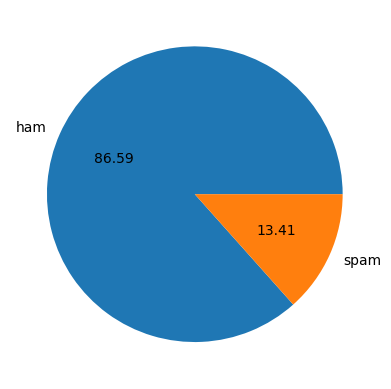

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [ ]:
#Data is imbalanced

In [ ]:
import nltk
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [ ]:
#number of word
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#breaking
df['num_sentences'] = df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,5572.000000,5572.000000
mean,80.118808,18.699390
std,59.690841,13.741932
min,2.000000,1.000000
25%,36.000000,9.000000
50%,61.000000,15.000000
75%,121.000000,27.000000
max,910.000000,220.000000


In [ ]:
#for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words
count,4825.000000,4825.000000
mean,71.023627,17.276269
std,58.016023,13.988585
min,2.000000,1.000000
25%,33.000000,8.000000
50%,52.000000,13.000000
75%,92.000000,22.000000
max,910.000000,220.000000


In [ ]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words
count,747.000000,747.000000
mean,138.866131,27.891566
std,29.183082,6.867007
min,13.000000,2.000000
25%,132.500000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

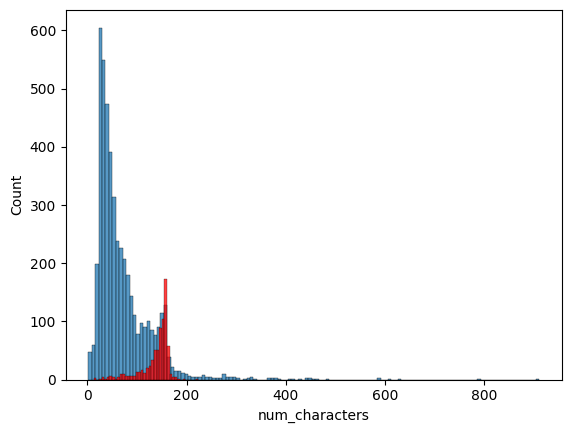

In [ ]:
#extracting\
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


Data Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
def transform_text(text):
    text = re.sub('[^a-zA-Z]', ' ',text) # remove non-alphabetical characters
    text = text.lower() # convert to lowercase
    text = text.split() # split into words
    ps = PorterStemmer()
    text = [ps.stem(word)for word in text if not word in set(stopwords.words('english'))] # stem words and remove stop words
    text = ' '.join(text) # join words back into a string
    return text # return the transformed text

# Apply the transformation to each row in the DataFrame
for i in range(0,5571):
    transformed_text = transform_text(df['text'][i])
    corpus.append(transformed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


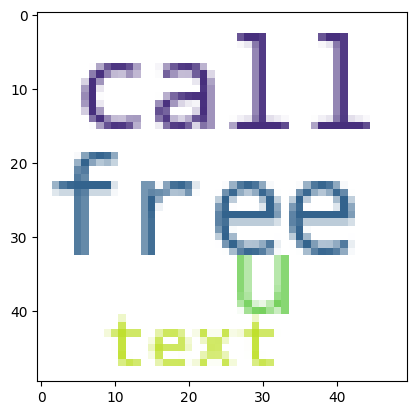

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11639

Model Building

In [ ]:
#baggage of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()


In [ ]:
X.shape


(5571, 6221)

In [ ]:
y = df['target'].values
y = y[:-1]

In [ ]:
print(X.shape)
print(y.shape)

(5571, 6221)
(5571,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.8717488789237668
[[840 121]
 [ 22 132]]
0.5217391304347826


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9704035874439462
[[961   0]
 [ 33 121]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9766816143497757
[[955   6]
 [ 20 134]]
0.9571428571428572


In [ ]:
#tfidf--mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9775784753363229, 0.9849624060150376)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9775784753363229
Precision -  0.9849624060150376
For  KN
Accuracy -  0.9147982062780269
Precision -  1.0
For  NB
Accuracy -  0.9704035874439462
Precision -  1.0
For  DT
Accuracy -  0.9497757847533632
Precision -  0.8951612903225806
For  LR
Accuracy -  0.968609865470852
Precision -  0.976
For  RF
Accuracy -  0.9811659192825112
Precision -  1.0
For  AdaBoost
Accuracy -  0.9721973094170404
Precision -  0.9767441860465116
For  BgC
Accuracy -  0.9748878923766816
Precision -  0.9436619718309859
For  ETC
Accuracy -  0.9811659192825112
Precision -  1.0
For  GBDT
Accuracy -  0.95695067264574
Precision -  0.9568965517241379
For  xgb
Accuracy -  0.9802690582959641
Precision -  0.9714285714285714


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)


performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914798,1.000000
2,NB,0.970404,1.000000
5,RF,0.981166,1.000000
8,ETC,0.981166,1.000000
0,SVC,0.977578,0.984962
6,AdaBoost,0.972197,0.976744
4,LR,0.968610,0.976000
10,xgb,0.980269,0.971429
9,GBDT,0.956951,0.956897
7,BgC,0.974888,0.943662


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.914798
1,NB,Accuracy,0.970404
2,RF,Accuracy,0.981166
3,ETC,Accuracy,0.981166
4,SVC,Accuracy,0.977578
5,AdaBoost,Accuracy,0.972197
6,LR,Accuracy,0.968610
7,xgb,Accuracy,0.980269
8,GBDT,Accuracy,0.956951
9,BgC,Accuracy,0.974888


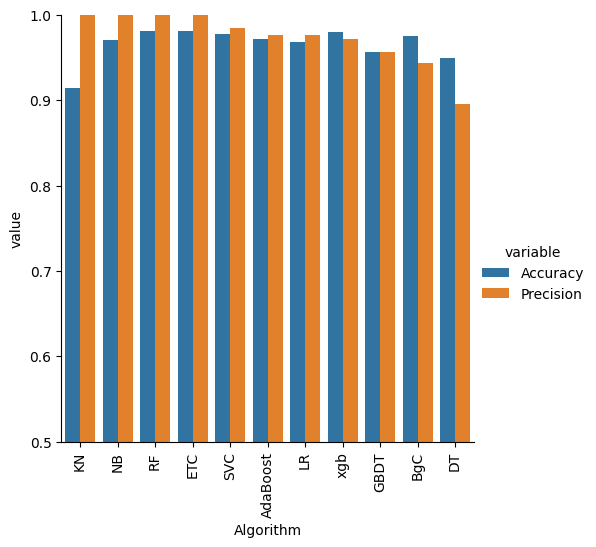

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf


#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)



# new_df = performance_df.merge(temp_df,on='Algorithm')
# new_df